# Name: Yousef Al-ghanim
# ID: 2122123716
# Final Project

# Results:

## 1-Variable identification:
|Variable|Variable definition|Data type|Missing data report|Report on the distribution of the data|level of analysis|
|---|---|---|---|---|---|
|text|The text of the tweet|Categorical(string)|0 missing data|The maximum number of characters in the text column is 280 and the minimum is 4|Customers|
|tweet_created_at|The date in which the tweet was created|Continuous(Datetime)|0 missing data|The maximum value for the column is 2017-12-16 14:33:24 and the minimum is 2017-11-24 21:55:38 |Customers|
|tweeted_to|The account in which the user/customer tweeted to (airline)|Categorical(string)|1 missing data|British Airways and Delta has the most percentage of tweets 20.5% and 19.97% respectively|Airline|
|statuses_count|The total number of tweets that the user tweeted|Continuous(Int64)|0 missing data|The maximum number of tweets tweeted by user is 703457 and the minimum is 1|Customers|
|followers_count|The total number of followers that the user have|Continuous(Int64)|0 missing data|The user with the highest number of followers has 3652640 and the lowest is 0|Customers|
|verified|True for being verified user and false if the user is not verified|Categorical(Boolean)|0 missing data|Only 1.71% of the users are verified|Customers|
|link_color|The color of user link in hex|Continuous(Int64)|0 missing data|There is 4345 diffrenet colors with 1DA1F2 being the most frequent link color between the user(default color) 39094 |Customers|
|sidebar_color|The color of user side bar in hex|Continuous(Int64)|0 missing data|There is 2421 diffrenet colors with DDEEF6 being the most frequent sidebar color between the user(default color) 44644|Customers|
|description|The description that the user write in his profile (bio)|Categorical(string)|8848 missing data|The maximum number of characters in the description column is 180 and the minimum is 1|Customers|

## 2-Transformed variables in the data set:
|Variable|Variable description|Steps in transformation|Distribution|level of analysis|
|---|---|---|---|
|hashtags|The hashtags in the tweets|first I tokenized the tweet then used regular expression to fetch the hashtags|The tweet with the most hashtags has 21 hashtags and the lowest has 1|Customers|
|mentions|The mentions in the tweets|first I tokenized the tweet then used regular expression to fetch the mentions|The tweet with the most mentions has 16 mentions and the lowest has 1|Customers|
|sentiment_score|A score for wether is the text is positive , negative or neutral and it's scaling from 1 to -1|I used vader package from nltk to get the sentiment score|The column is skewed to the left|Customers|
|sentiment|The sentiment of the text wether it's positive, negative or neutral|I took the sentiment score and checked if the score is greater than 0.5 then it's positive and if the score is less than -0.5 then it's negative if it's in between then it's neutral|63.57% of the tweets are neutral and 21.76% are positive and the 14.67% are negative|Customers|
|followers_count_1|This is the followers count of users plus 1, so we can calculate the log|Added 1 to all the users followers count|The user with the highest number of followers has 3652641 and the lowest is 1|Customers|
|log_followers_count|The log of the followers count|applied log to every followers count for every user|Skewed to the right|Customers|
|log_statuses_count|The log of the statuses (number of tweets) count|applied log to every statuses count for every user|Skewed to the right|Customers|
|negative_ratio|The ratio of negative tweets in every airline|I grouped the dataframe by airlines(tweeted_to) then divided the number of negative tweets by the sum of positive and negative tweets excluding the neutral|The highest negative ratio is 0.598(spiritairlines)and the lowest is 0.22(flyPAL)|Airline|
|positive_ratio|The ratio of positive tweets in every airline|I grouped the dataframe by airlines(tweeted_to) then divided the number of positive tweets by the sum of positive and negative tweets excluding the neutral|The highest positive ratio is 0.78(flyPAL)and the lowest is 0.401174168297(spiritairlines)|Airline|
|negative_reason|The reason why the tweet is negative|Used supervised machine learning to feed labeled data and predict unlabeled data|Customer service issues is the most common reason 37.33%|Customers|
|gender|The gender of the user (customer)|Used supervised machine learning to feed labeled data and predict unlabeled data|50.52% of all users are females and 49.48% are males|Customers


# Analysis:

In [1]:
import pandas as pd
import altair as alt
import datetime
import numpy as np
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import regexp_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
alt.Chart.max_rows=80000
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
def to_altair(dataframe):   
    '''This function take a dataframe and create a copy of that dataframe, then export it to json oriented as a records
        and the date is formated to iso,also change the type of datetime to string, then return the name of the json file'''
    dataframe_copy=dataframe.copy()
    for column in dataframe_copy:
        if dataframe_copy.loc[:,column].dtype == 'datetime64[ns]':
            dataframe_copy.loc[:,column] = dataframe_copy.loc[:,column].astype(str)
        else:
            pass
    dataframe_copy.to_json('chart.json', orient='records',date_format='iso')
    return('chart.json')
pd.DataFrame.to_altair = to_altair
%matplotlib inline

In [2]:
tweets_df = pd.read_csv('top20_airlines_customers_tweets.csv')
tweets_df2=pd.read_json('top20_airlines_customers_tweets2.json')

In [3]:
tweets_df.head()

,coordinates,description,followers_count,following_count,link_color,location,profile_created,profileimage,screen_name,sidebar_color,statuses_count,text,tweet_created_at,tweet_favourites_count,tweet_id,tweet_retweet_count,tweet_source,tweeted_to,user_favourites_count,user_name,user_timezone,verified
0,NaN,A work in progress. Living in the flow. Submis...,120.0,98,1DA1F2,"Bowling Green, KY",2017-04-28 22:27:58,http://pbs.twimg.com/profile_images/9217698593...,ChaseDavisNGSF,DDEEF6,949,@AmericanAir @Jesseraygo1way @AmericanAir i re...,2017-12-04 22:26:23,0.0,9.378103e+17,0,Twitter for iPhone,AmericanAir,890,Chase Davis,NaN,False
1,NaN,NaN,5.0,19,1DA1F2,NaN,2012-07-19 22:04:54,http://abs.twimg.com/sticky/default_profile_im...,lennye1970,DDEEF6,3,@AmericanAir Thanks for your quick response an...,2017-12-04 22:26:22,0.0,9.378103e+17,0,Twitter Web Client,AmericanAir,0,Leich,NaN,False
2,NaN,Writing frightening verse to a buck-toothed gi...,759.0,718,1B95E0,"Utah, USA",2008-02-27 04:46:28,http://pbs.twimg.com/profile_images/7762920839...,nathanmills,000000,5138,"@Delta Hey, I used to be Platinum Medallion. W...",2017-12-04 22:24:34,0.0,9.378099e+17,0,Twitter Web Client,Delta,1682,nathanmills,Mountain Time (US & Canada),False
3,NaN,NaN,191.0,265,0084B4,Cayman Islands,2009-10-24 05:20:55,http://pbs.twimg.com/profile_images/9198615514...,PaulTReynolds,DDEEF6,2148,@British_Airways You might want to rethink thi...,2017-12-04 22:24:32,0.0,9.378099e+17,0,Twitter for Mac,British_Airways,1348,Paul Reynolds,Central America,False
4,NaN,Just a small town girl...,72.0,316,0084B4,"Fort Wayne, IN",2011-03-15 05:43:54,http://pbs.twimg.com/profile_images/8360473255...,Angel13224,DDEEF6,3478,@Delta real holiday wishlist. To get home wit...,2017-12-04 22:23:28,0.0,9.378096e+17,0,Twitter for iPhone,Delta,306,Rebecca K.,Eastern Time (US & Canada),False


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30199 entries, 0 to 30198
Data columns (total 22 columns):
coordinates               31 non-null object
description               21351 non-null object
followers_count           30199 non-null float64
following_count           30199 non-null int64
link_color                30199 non-null object
location                  21158 non-null object
profile_created           30199 non-null object
profileimage              30199 non-null object
screen_name               30199 non-null object
sidebar_color             30199 non-null object
statuses_count            30199 non-null int64
text                      30199 non-null object
tweet_created_at          30199 non-null object
tweet_favourites_count    30199 non-null float64
tweet_id                  30199 non-null float64
tweet_retweet_count       30199 non-null int64
tweet_source              30199 non-null object
tweeted_to                30199 non-null object
user_favourites_count     3019

In [5]:
#changing the data type of tweet_created_at column to datetime
tweets_df.tweet_created_at = pd.to_datetime(tweets_df.tweet_created_at)
#changing the data type of profile_created column to datetime
tweets_df.profile_created = pd.to_datetime(tweets_df.profile_created)
#chaning the data type of followers_count to int64
tweets_df.followers_count=tweets_df.followers_count.astype(np.int64)
#chaning the data type of tweet_favourites_count to int64
tweets_df.tweet_favourites_count=tweets_df.tweet_favourites_count.astype(np.int64)

In [6]:
tweets_df2.head()

,coordinates,description,followers_count,following_count,link_color,location,profile_created,profileimage,screen_name,sidebar_color,statuses_count,text,tweet_created_at,tweet_favourites_count,tweet_id,tweet_retweet_count,tweet_source,tweeted_to,user_favourites_count,user_name,user_timezone,verified
0,None,"Adventurer, Photographer, Traveler. Exploring ...",2542,200,1DA1F2,"Falls Church, VA",1288292877000,http://pbs.twimg.com/profile_images/9159368001...,JeffTheWanderer,DDEEF6,16893,@AmericanAir I understand weights and balances...,2017-12-16 14:33:24,0,942039963088183296,0,Twitter for iPhone,AmericanAir,10281,Jeff The Wanderer,Eastern Time (US & Canada),False
1,None,I'm the voice,3194,3855,0099B9,sheffield,1289830417000,http://pbs.twimg.com/profile_images/8359067544...,iamnotjhud,DDEEF6,14462,@British_Airways It was the best experience I'...,2017-12-16 14:32:32,0,942039746200702976,0,Twitter Lite,British_Airways,7164,love the voice,None,False
2,None,"Lover of all animals, long bike rides, good bo...",169,389,E02A82,#bostonstrong,1287634934000,http://pbs.twimg.com/profile_images/4123375275...,Katelyn_ONeil,B8FFB8,4214,@JetBlue I have tried to contact you and no he...,2017-12-16 14:32:24,0,942039714596577280,0,Twitter for iPhone,JetBlue,569,katelyn,Eastern Time (US & Canada),False
3,None,Geoscientist-come-climate science advocate. In...,540,2036,1DA1F2,"Manchester, England",1431174255000,http://pbs.twimg.com/profile_images/8170537882...,DrRachelofManc,DDEEF6,4017,"@British_Airways hello, is departure tax inclu...",2017-12-16 14:32:20,0,942039695587864576,0,Twitter for Android,British_Airways,2256,Rachel Harding,Pacific Time (US & Canada),False
4,None,"Author, Literature Connoisseur, Photo Enthusi...",5,26,1DA1F2,United States,1412266782000,http://pbs.twimg.com/profile_images/7976335283...,TheAgencyO_o,DDEEF6,73,@AmericanAir what weather conditions exist in ...,2017-12-16 14:32:07,0,942039641506680832,0,Twitter for iPhone,AmericanAir,5,Donna D. Bellot,Central Time (US & Canada),False


In [7]:
tweets_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45034 entries, 0 to 45033
Data columns (total 22 columns):
coordinates               56 non-null object
description               45034 non-null object
followers_count           45034 non-null int64
following_count           45034 non-null int64
link_color                45034 non-null object
location                  45034 non-null object
profile_created           45034 non-null int64
profileimage              45034 non-null object
screen_name               45034 non-null object
sidebar_color             45034 non-null object
statuses_count            45034 non-null int64
text                      45034 non-null object
tweet_created_at          45034 non-null datetime64[ns]
tweet_favourites_count    45034 non-null int64
tweet_id                  45034 non-null int64
tweet_retweet_count       45034 non-null int64
tweet_source              45034 non-null object
tweeted_to                45033 non-null object
user_favourites_count     450

In [8]:
#chaning format of profile_created and data type
tweets_df2.profile_created=tweets_df2.profile_created.apply(lambda x: datetime.datetime.fromtimestamp(float(x)/1000.))
tweets_df2.profile_created = pd.to_datetime(tweets_df2.profile_created,format="%Y-%m-%d %H:%M:%S")

In [9]:
tweets_df=tweets_df.append(tweets_df2).reset_index(drop=True)

In [10]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75233 entries, 0 to 75232
Data columns (total 22 columns):
coordinates               87 non-null object
description               66385 non-null object
followers_count           75233 non-null int64
following_count           75233 non-null int64
link_color                75233 non-null object
location                  66192 non-null object
profile_created           75233 non-null datetime64[ns]
profileimage              75233 non-null object
screen_name               75233 non-null object
sidebar_color             75233 non-null object
statuses_count            75233 non-null int64
text                      75233 non-null object
tweet_created_at          75233 non-null datetime64[ns]
tweet_favourites_count    75233 non-null int64
tweet_id                  75233 non-null float64
tweet_retweet_count       75233 non-null int64
tweet_source              75233 non-null object
tweeted_to                75232 non-null object
user_favourites_co

In [11]:
# to make sure that all the tweets from customer not from the airline themselves
tweets_df = tweets_df[tweets_df.screen_name != tweets_df.tweeted_to]

In [39]:
tweets_df[tweets_df.tweeted_to.isnull()]

,coordinates,description,followers_count,following_count,link_color,location,profile_created,profileimage,screen_name,sidebar_color,statuses_count,text,tweet_created_at,tweet_favourites_count,tweet_id,tweet_retweet_count,tweet_source,tweeted_to,user_favourites_count,user_name,user_timezone,verified,hashtags,mentions,sentiment_score,sentiment
33745,None,Just a dog making his way through life.,2378,589,000000,"Orlando, FL",2007-04-12 07:08:16,http://pbs.twimg.com/profile_images/4598216520...,draco751,EFEFEF,9042,@delta doesn't want to talk to me https://t.co...,2017-12-15 16:10:27,1,9.417020e+17,0,Periscope,None,6285,Banshee,Eastern Time (US & Canada),False,NaN,@delta,-0.0572,neutral


In [40]:
tweets_df=tweets_df.drop(tweets_df.index[33745])

In [12]:
# Checking for the distribution of text column:
print(tweets_df.text.apply(lambda x: len(re.sub(r"\n|amp;|gt;|@\w+|http\S+", "", x).strip())).max())
print(tweets_df.text.apply(lambda x: len(re.sub(r"\n|amp;|gt;|@\w+|http\S+", "", x).strip())).min())

280
4


In [13]:
# Checking for the distribution of tweet_created_at column:
print(tweets_df.tweet_created_at.max())
print(tweets_df.tweet_created_at.min())

2017-12-16 14:33:24
2017-11-24 21:55:38


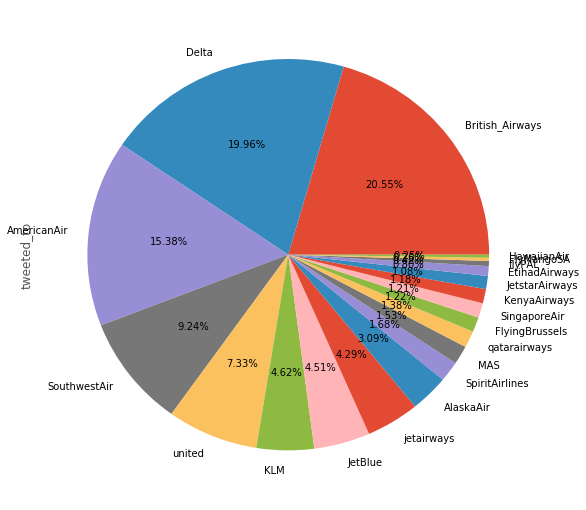

In [137]:
# Checking for the distribution of tweeted_to column:
tweets_df.tweeted_to.value_counts().plot(kind='pie', autopct='%1.2f%%',figsize=[9,9])

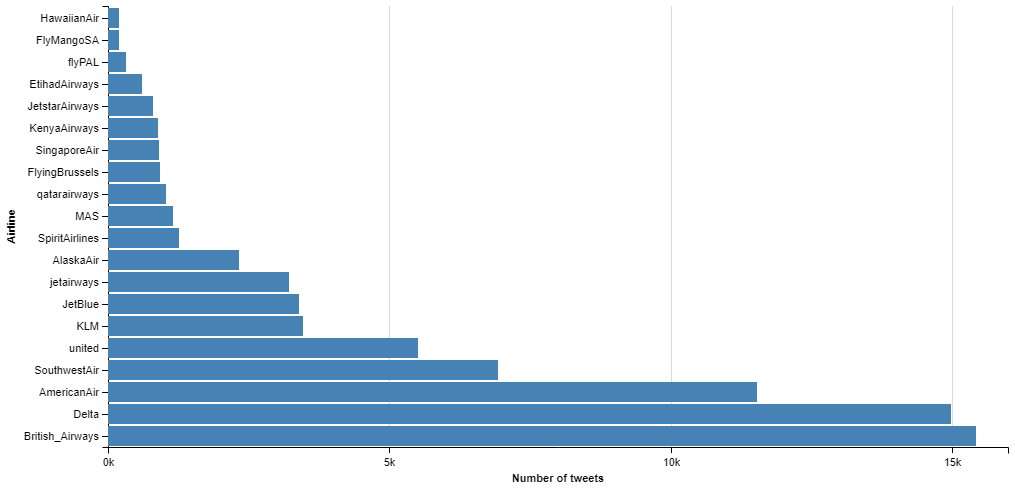

In [146]:
# Checking for the distribution of tweeted_to column cont:
alt.Chart(tweets_df.to_altair()).mark_bar().encode(
    y=alt.Y('tweeted_to:N',sort=alt.SortField(field='*',op='count',order='ascending'),title='Airline'),
    x=alt.X('count(*):Q',title='Number of tweets')).configure_cell(width=900, height=600)

In [16]:
# Checking for the distribution of statuses_count column:
print(tweets_df.statuses_count.max())
print(tweets_df.statuses_count.min())

703457
1


In [17]:
# Checking for the distribution of followers_count column:
print(tweets_df.followers_count.max())
print(tweets_df.followers_count.min())

3652640
0


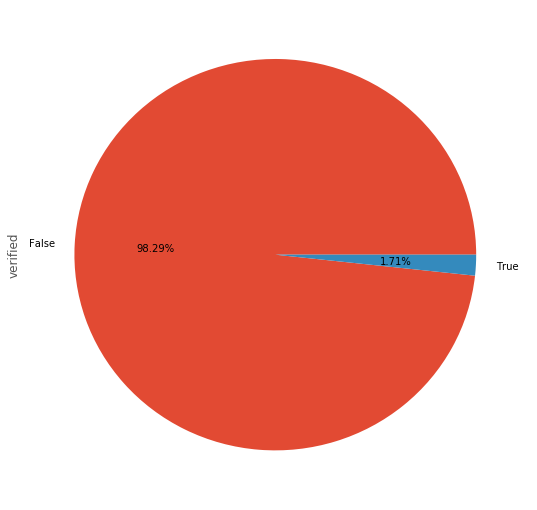

In [18]:
# Checking for the distribution of verified column:
tweets_df.verified.value_counts().plot(kind='pie', autopct='%1.2f%%',figsize=[9,9])

In [19]:
# Checking for the distribution of link_color column:
tweets_df.link_color.value_counts().head()

1DA1F2    39095
0084B4     5086
009999     1983
1B95E0     1765
2FC2EF     1743
Name: link_color, dtype: int64

In [20]:
# Checking for the distribution of sidebar_color column:
tweets_df.sidebar_color.value_counts().head()

DDEEF6    44645
000000     7609
EFEFEF     2717
252429     2278
C0DFEC     1523
Name: sidebar_color, dtype: int64

In [21]:
# Checking for the distribution of description column:
print(tweets_df[tweets_df.description.notnull()].description.apply(lambda x: len(x.strip())).max())
print(tweets_df[tweets_df.description.notnull()].description.apply(lambda x: len(x.strip())).min())

180
0


In [22]:
tweets_df['hashtags']=tweets_df.text.apply(lambda x:','.join(regexp_tokenize(text=x,pattern="#\w+")))

In [23]:
# Checking for the distribution of hashtags column:
print(tweets_df[tweets_df.hashtags.notnull()].hashtags.apply(lambda x: len(x.split(','))).max())
print(tweets_df[tweets_df.hashtags.notnull()].hashtags.apply(lambda x: len(x.split(','))).min())

21
1


In [24]:
tweets_df['mentions']=tweets_df.text.apply(lambda x:','.join(regexp_tokenize(text=x,pattern="@\w+")))

In [25]:
# Checking for the distribution of mentions column:
print(tweets_df[tweets_df.mentions.notnull()].mentions.apply(lambda x: len(x.split(','))).max())
print(tweets_df[tweets_df.mentions.notnull()].mentions.apply(lambda x: len(x.split(','))).min())

16
1


In [26]:
tweets_df.head()

,coordinates,description,followers_count,following_count,link_color,location,profile_created,profileimage,screen_name,sidebar_color,statuses_count,text,tweet_created_at,tweet_favourites_count,tweet_id,tweet_retweet_count,tweet_source,tweeted_to,user_favourites_count,user_name,user_timezone,verified,hashtags,mentions
0,NaN,A work in progress. Living in the flow. Submis...,120,98,1DA1F2,"Bowling Green, KY",2017-04-28 22:27:58,http://pbs.twimg.com/profile_images/9217698593...,ChaseDavisNGSF,DDEEF6,949,@AmericanAir @Jesseraygo1way @AmericanAir i re...,2017-12-04 22:26:23,0,9.378103e+17,0,Twitter for iPhone,AmericanAir,890,Chase Davis,NaN,False,,"@AmericanAir,@Jesseraygo1way,@AmericanAir"
1,NaN,NaN,5,19,1DA1F2,NaN,2012-07-19 22:04:54,http://abs.twimg.com/sticky/default_profile_im...,lennye1970,DDEEF6,3,@AmericanAir Thanks for your quick response an...,2017-12-04 22:26:22,0,9.378103e+17,0,Twitter Web Client,AmericanAir,0,Leich,NaN,False,,@AmericanAir
2,NaN,Writing frightening verse to a buck-toothed gi...,759,718,1B95E0,"Utah, USA",2008-02-27 04:46:28,http://pbs.twimg.com/profile_images/7762920839...,nathanmills,000000,5138,"@Delta Hey, I used to be Platinum Medallion. W...",2017-12-04 22:24:34,0,9.378099e+17,0,Twitter Web Client,Delta,1682,nathanmills,Mountain Time (US & Canada),False,,@Delta
3,NaN,NaN,191,265,0084B4,Cayman Islands,2009-10-24 05:20:55,http://pbs.twimg.com/profile_images/9198615514...,PaulTReynolds,DDEEF6,2148,@British_Airways You might want to rethink thi...,2017-12-04 22:24:32,0,9.378099e+17,0,Twitter for Mac,British_Airways,1348,Paul Reynolds,Central America,False,,@British_Airways
4,NaN,Just a small town girl...,72,316,0084B4,"Fort Wayne, IN",2011-03-15 05:43:54,http://pbs.twimg.com/profile_images/8360473255...,Angel13224,DDEEF6,3478,@Delta real holiday wishlist. To get home wit...,2017-12-04 22:23:28,0,9.378096e+17,0,Twitter for iPhone,Delta,306,Rebecca K.,Eastern Time (US & Canada),False,#delta,@Delta


In [27]:
tweets_df = tweets_df.replace('', np.nan).reset_index(drop=Tur)

In [28]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75071 entries, 0 to 75070
Data columns (total 24 columns):
coordinates               87 non-null object
description               51343 non-null object
followers_count           75071 non-null int64
following_count           75071 non-null int64
link_color                75071 non-null object
location                  51096 non-null object
profile_created           75071 non-null datetime64[ns]
profileimage              75071 non-null object
screen_name               75071 non-null object
sidebar_color             75071 non-null object
statuses_count            75071 non-null int64
text                      75071 non-null object
tweet_created_at          75071 non-null datetime64[ns]
tweet_favourites_count    75071 non-null int64
tweet_id                  75071 non-null float64
tweet_retweet_count       75071 non-null int64
tweet_source              75071 non-null object
tweeted_to                75070 non-null object
user_favourites_co

In [29]:
sentiment_analyzer = SentimentIntensityAnalyzer()
tweets_df['sentiment_score'] = tweets_df.text.apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

count    75071.000000
mean         0.071406
std          0.476450
min         -0.995800
25%         -0.296000
50%          0.000000
75%          0.457200
max          0.987900
Name: sentiment_score, dtype: float64


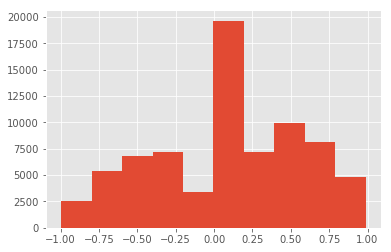

In [30]:
# Checking for the distribution of sentiment_score column:
tweets_df.sentiment_score.hist()
print(tweets_df.sentiment_score.describe())

In [31]:
def sentiment_classification(score):
    if score > 0.5 :
        return 'positive'
    elif score < -0.5 :
        return 'negative'
    else:
        return 'neutral'

In [32]:
tweets_df['sentiment'] = tweets_df.sentiment_score.apply(sentiment_classification)

In [33]:
tweets_df.tail()

,coordinates,description,followers_count,following_count,link_color,location,profile_created,profileimage,screen_name,sidebar_color,statuses_count,text,tweet_created_at,tweet_favourites_count,tweet_id,tweet_retweet_count,tweet_source,tweeted_to,user_favourites_count,user_name,user_timezone,verified,hashtags,mentions,sentiment_score,sentiment
75066,None,"Welcome to http://t.co/O1jKN3DD36, created to ...",1533,589,0084B4,"Lagos, Nigeria",2014-03-10 19:40:40,http://pbs.twimg.com/profile_images/8321576336...,topontravel,DDEEF6,4742,@British_Airways to Increase flight to Holiday...,2017-12-06 14:31:38,0,9.384156e+17,0,Twitter Web Client,British_Airways,1241,Top On Travel,None,False,"#BA,#summer,#2018,#holidayseason",@British_Airways,0.6124,positive
75067,None,"MBA god knows why, an ex HR professional, chan...",144,286,FFCC4D,Mumbai,2009-03-18 19:23:44,http://pbs.twimg.com/profile_images/8864711212...,violinmirage,000000,328,@jetairways Ok so today you are delaying 9w424...,2017-12-06 14:31:24,0,9.384156e+17,0,Twitter for iPhone,jetairways,299,Anuj,None,False,#jetairways,@jetairways,-0.3046,neutral
75068,None,Haitian🇭🇹,239,86,1DA1F2,O'Block144,2011-09-30 05:42:48,http://pbs.twimg.com/profile_images/8530499515...,OliOloOlu,DDEEF6,15871,@Delta y’all need better dinner food in first ...,2017-12-06 14:31:06,0,9.384155e+17,0,Twitter for iPhone,Delta,2222,Oli'144,Atlantic Time (Canada),False,NaN,@Delta,0.5423,positive
75069,None,Stop worrying and enjoy the experiment,581,385,0084B4,"Seattle, WA",2009-03-23 04:25:48,http://pbs.twimg.com/profile_images/6757110687...,benofreedman,DDFFCC,1163,"@AlaskaAir This was flight 12, about twenty of...",2017-12-06 14:30:53,0,9.384155e+17,0,Twitter for iPhone,AlaskaAir,762,Beno Freedman,Eastern Time (US & Canada),False,NaN,"@AlaskaAir,@SeaTacAirport",0.1027,neutral
75070,None,NaN,21,90,036564,NaN,2009-02-27 17:56:44,http://pbs.twimg.com/profile_images/2652564573...,Boylen,033649,114,@JetBlue is killing me lately. Pilot tells us...,2017-12-06 14:30:39,0,9.384154e+17,1,Twitter for iPhone,JetBlue,13,Donnelly,Eastern Time (US & Canada),False,#mosaiclife,@JetBlue,-0.2640,neutral


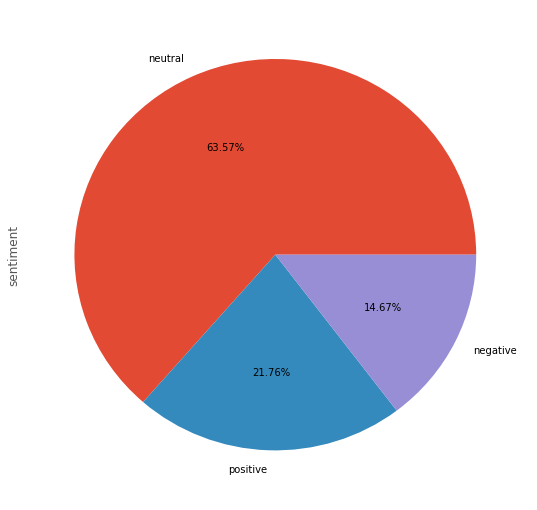

In [34]:
# Checking the distribution of sentiment column:
tweets_df.sentiment.value_counts().plot(kind='pie', autopct='%1.2f%%',figsize=[9,9])

In [35]:
# Checking for the distribution of sentiment column:
tweets_df.sentiment.value_counts()

neutral     47720
positive    16335
negative    11016
Name: sentiment, dtype: int64

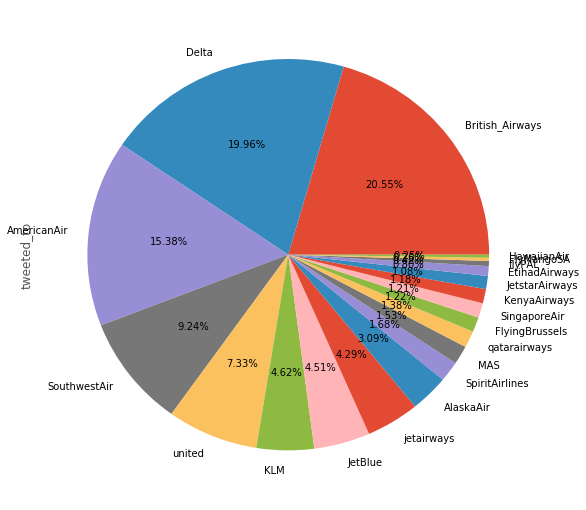

In [36]:
tweets_df.tweeted_to.value_counts().plot(kind='pie', autopct='%1.2f%%',figsize=[9,9])

In [37]:
tweets_df.tail()

,coordinates,description,followers_count,following_count,link_color,location,profile_created,profileimage,screen_name,sidebar_color,statuses_count,text,tweet_created_at,tweet_favourites_count,tweet_id,tweet_retweet_count,tweet_source,tweeted_to,user_favourites_count,user_name,user_timezone,verified,hashtags,mentions,sentiment_score,sentiment
75066,None,"Welcome to http://t.co/O1jKN3DD36, created to ...",1533,589,0084B4,"Lagos, Nigeria",2014-03-10 19:40:40,http://pbs.twimg.com/profile_images/8321576336...,topontravel,DDEEF6,4742,@British_Airways to Increase flight to Holiday...,2017-12-06 14:31:38,0,9.384156e+17,0,Twitter Web Client,British_Airways,1241,Top On Travel,None,False,"#BA,#summer,#2018,#holidayseason",@British_Airways,0.6124,positive
75067,None,"MBA god knows why, an ex HR professional, chan...",144,286,FFCC4D,Mumbai,2009-03-18 19:23:44,http://pbs.twimg.com/profile_images/8864711212...,violinmirage,000000,328,@jetairways Ok so today you are delaying 9w424...,2017-12-06 14:31:24,0,9.384156e+17,0,Twitter for iPhone,jetairways,299,Anuj,None,False,#jetairways,@jetairways,-0.3046,neutral
75068,None,Haitian🇭🇹,239,86,1DA1F2,O'Block144,2011-09-30 05:42:48,http://pbs.twimg.com/profile_images/8530499515...,OliOloOlu,DDEEF6,15871,@Delta y’all need better dinner food in first ...,2017-12-06 14:31:06,0,9.384155e+17,0,Twitter for iPhone,Delta,2222,Oli'144,Atlantic Time (Canada),False,NaN,@Delta,0.5423,positive
75069,None,Stop worrying and enjoy the experiment,581,385,0084B4,"Seattle, WA",2009-03-23 04:25:48,http://pbs.twimg.com/profile_images/6757110687...,benofreedman,DDFFCC,1163,"@AlaskaAir This was flight 12, about twenty of...",2017-12-06 14:30:53,0,9.384155e+17,0,Twitter for iPhone,AlaskaAir,762,Beno Freedman,Eastern Time (US & Canada),False,NaN,"@AlaskaAir,@SeaTacAirport",0.1027,neutral
75070,None,NaN,21,90,036564,NaN,2009-02-27 17:56:44,http://pbs.twimg.com/profile_images/2652564573...,Boylen,033649,114,@JetBlue is killing me lately. Pilot tells us...,2017-12-06 14:30:39,0,9.384154e+17,1,Twitter for iPhone,JetBlue,13,Donnelly,Eastern Time (US & Canada),False,#mosaiclife,@JetBlue,-0.2640,neutral


In [38]:
tweets_df.verified.corr(tweets_df.followers_count)
# there is a positive relationship between being verified and your following count

0.28087979802805857

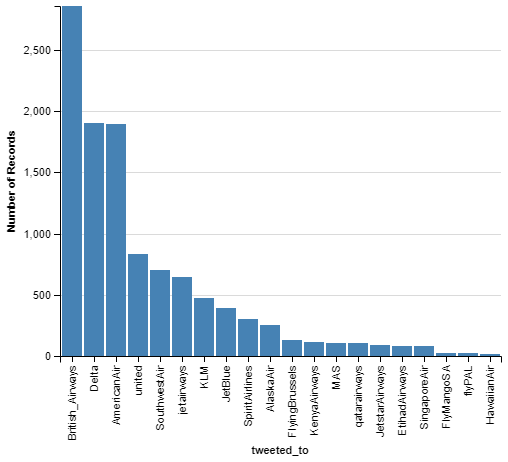

In [41]:
alt.Chart(tweets_df[tweets_df.sentiment=='negative'].to_altair()).mark_bar().encode(x=alt.X('tweeted_to:N',sort=alt.SortField(field='*',op='count',order='descending')),y='count(*)')

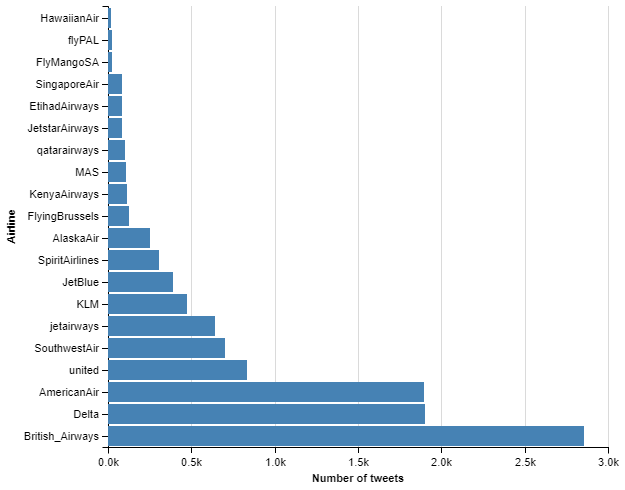

In [42]:
alt.Chart(tweets_df.to_altair()).mark_bar().encode(y=alt.Y('tweeted_to:N',sort=alt.SortField(field='*',op='count',order='ascending'),title='Airline'),x=alt.X('count(*):Q',title='Number of tweets'))

In [43]:
tweets_df['negative_ratio']=tweets_df[tweets_df.sentiment=='negative'].groupby('tweeted_to').transform('count').sentiment / tweets_df[tweets_df.sentiment!='neutral'].groupby('tweeted_to').transform('count').sentiment

In [44]:
# Checking the distribution of negative_ratio column:
print(tweets_df.negative_ratio.max())
print(tweets_df.negative_ratio.min())


0.598825831703
0.22


In [45]:
tweets_df.head()

,coordinates,description,followers_count,following_count,link_color,location,profile_created,profileimage,screen_name,sidebar_color,statuses_count,text,tweet_created_at,tweet_favourites_count,tweet_id,tweet_retweet_count,tweet_source,tweeted_to,user_favourites_count,user_name,user_timezone,verified,hashtags,mentions,sentiment_score,sentiment,negative_ratio
0,NaN,A work in progress. Living in the flow. Submis...,120,98,1DA1F2,"Bowling Green, KY",2017-04-28 22:27:58,http://pbs.twimg.com/profile_images/9217698593...,ChaseDavisNGSF,DDEEF6,949,@AmericanAir @Jesseraygo1way @AmericanAir i re...,2017-12-04 22:26:23,0,9.378103e+17,0,Twitter for iPhone,AmericanAir,890,Chase Davis,NaN,False,NaN,"@AmericanAir,@Jesseraygo1way,@AmericanAir",0.4927,neutral,NaN
1,NaN,NaN,5,19,1DA1F2,NaN,2012-07-19 22:04:54,http://abs.twimg.com/sticky/default_profile_im...,lennye1970,DDEEF6,3,@AmericanAir Thanks for your quick response an...,2017-12-04 22:26:22,0,9.378103e+17,0,Twitter Web Client,AmericanAir,0,Leich,NaN,False,NaN,@AmericanAir,0.7003,positive,NaN
2,NaN,Writing frightening verse to a buck-toothed gi...,759,718,1B95E0,"Utah, USA",2008-02-27 04:46:28,http://pbs.twimg.com/profile_images/7762920839...,nathanmills,000000,5138,"@Delta Hey, I used to be Platinum Medallion. W...",2017-12-04 22:24:34,0,9.378099e+17,0,Twitter Web Client,Delta,1682,nathanmills,Mountain Time (US & Canada),False,NaN,@Delta,0.5423,positive,NaN
3,NaN,NaN,191,265,0084B4,Cayman Islands,2009-10-24 05:20:55,http://pbs.twimg.com/profile_images/9198615514...,PaulTReynolds,DDEEF6,2148,@British_Airways You might want to rethink thi...,2017-12-04 22:24:32,0,9.378099e+17,0,Twitter for Mac,British_Airways,1348,Paul Reynolds,Central America,False,NaN,@British_Airways,0.4215,neutral,NaN
4,NaN,Just a small town girl...,72,316,0084B4,"Fort Wayne, IN",2011-03-15 05:43:54,http://pbs.twimg.com/profile_images/8360473255...,Angel13224,DDEEF6,3478,@Delta real holiday wishlist. To get home wit...,2017-12-04 22:23:28,0,9.378096e+17,0,Twitter for iPhone,Delta,306,Rebecca K.,Eastern Time (US & Canada),False,#delta,@Delta,0.6070,positive,NaN


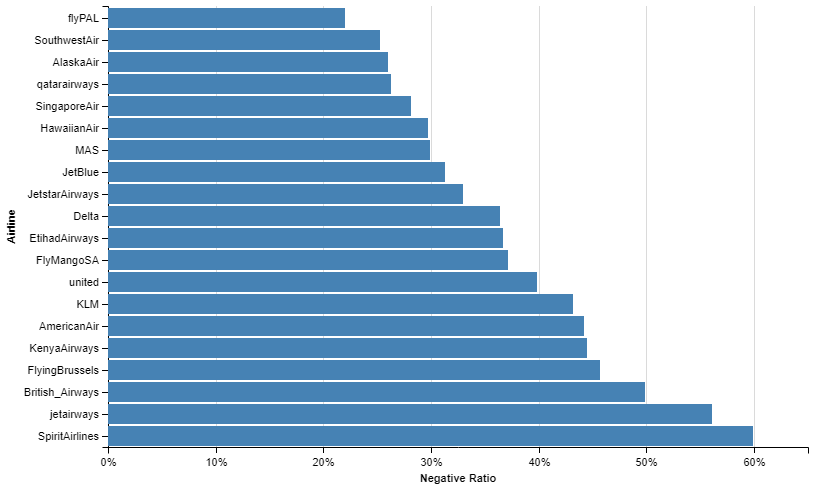

In [165]:
alt.Chart(tweets_df[tweets_df.sentiment=='negative'].to_altair()).mark_bar().encode(y=alt.Y('tweeted_to:N',sort=alt.SortField(field='negative_ratio',op='max',order='ascending'),title='Airline'),x=alt.X('negative_ratio:Q',title='Negative Ratio',axis=alt.Axis(format='%'))).configure_cell(width=700, height=600)

In [47]:
tweets_df['positive_ratio']=tweets_df[tweets_df.sentiment=='positive'].groupby('tweeted_to').transform('count').sentiment / tweets_df[tweets_df.sentiment!='neutral'].groupby('tweeted_to').transform('count').sentiment

In [48]:
# Checking the distribution of negative_ratio column:
print(tweets_df.positive_ratio.max())
print(tweets_df.positive_ratio.min())

0.78
0.401174168297


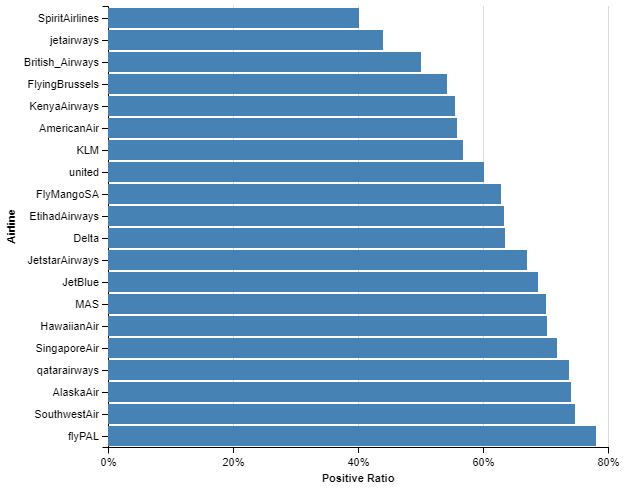

In [49]:
alt.Chart(tweets_df[tweets_df.sentiment=='positive'].to_altair()).mark_bar().encode(y=alt.Y('tweeted_to:N',sort=alt.SortField(field='positive_ratio',op='max',order='ascending'),title='Airline'),x=alt.X('positive_ratio:Q',title='Positive Ratio',axis=alt.Axis(format='%')))

In [50]:
#removing the excess characters
tweets_df['text_length'] = tweets_df.text.apply(lambda x: len(re.sub(r"\n|amp;|gt;|@\w+|http\S+", "", x).strip()))
tweets_df.text_length.max()

280

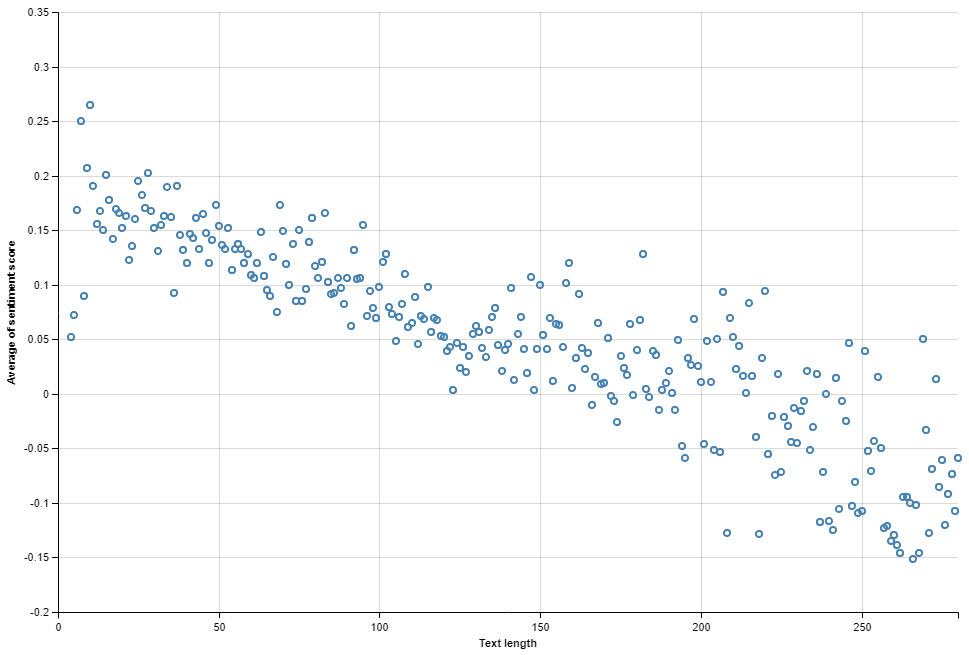

In [150]:
alt.Chart(tweets_df.to_altair()).mark_point().encode(x=alt.X('text_length',title='Text length'),y=alt.Y('mean(sentiment_score):Q',axis=alt.Axis(format='#'),title='Average of sentiment score')).configure_cell(width=900, height=600)

In [52]:
tweets_df.text_length.corr(tweets_df.sentiment_score)

-0.14700203664826561

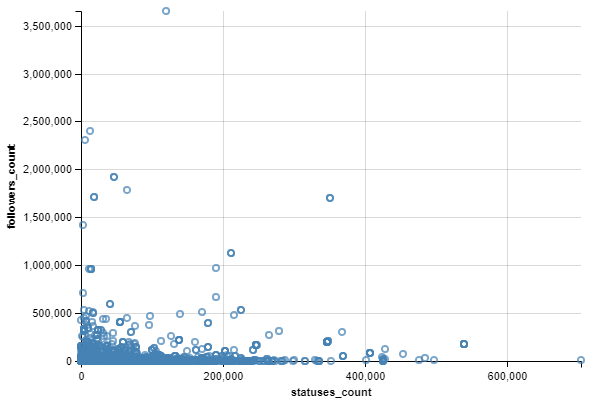

In [53]:
alt.Chart(tweets_df.to_altair()).mark_point().encode(x='statuses_count',y='followers_count')

In [54]:
tweets_df['followers_count_1'] = tweets_df.followers_count + 1
tweets_df['log_followers_count'] = tweets_df.followers_count_1.apply(np.log)
tweets_df['log_statuses_count'] = tweets_df.statuses_count.apply(np.log)

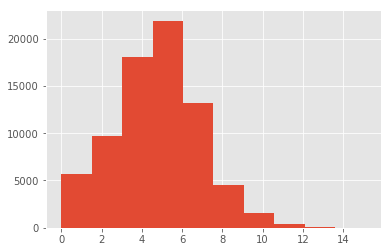

In [55]:
# Checking the distribution for log_followers_count column:
tweets_df.log_followers_count.hist()

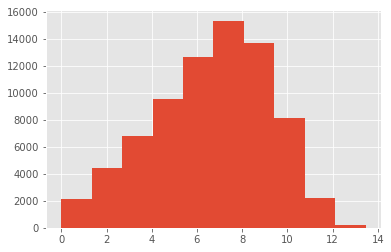

In [56]:
# Checking the distribution for log_statuses_count column:
tweets_df.log_statuses_count.hist()

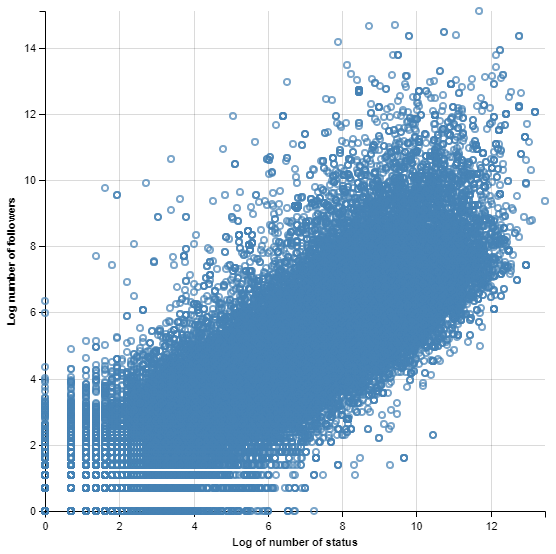

In [162]:
alt.Chart(tweets_df.to_altair()).mark_point().encode(x=alt.X('log_statuses_count',title='Log of number of status'),y=alt.Y('log_followers_count',title='Log number of followers')).configure_cell(width=500, height=500)

In [58]:
tweets_df[tweets_df.description.notnull()].description.apply(len).corr(tweets_df.statuses_count)

0.11510339972643532

In [59]:
reason_df = pd.read_csv('Tweets_reason.csv')

In [60]:
reason_df=reason_df[reason_df.airline_sentiment == 'negative'].reset_index(drop=True)

In [61]:
reason_df=reason_df[(reason_df.negativereason_confidence == 1) & (reason_df.airline_sentiment_confidence==1)].reset_index(drop=True)

In [62]:
reason_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570300817074462722,negative,1.0,Can't Tell,1.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
1,570276917301137409,negative,1.0,Bad Flight,1.0,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)
2,570249102404923392,negative,1.0,Customer Service Issue,1.0,Virgin America,NaN,Leora13,NaN,0,@VirginAmerica status match program. I applie...,NaN,2015-02-24 07:49:15 -0800,NaN,NaN
3,570207886493782019,negative,1.0,Bad Flight,1.0,Virgin America,NaN,blackjackpro911,NaN,0,@VirginAmerica amazing to me that we can't get...,"[42.361016, -71.02000488]",2015-02-24 05:05:28 -0800,"San Mateo, CA & Las Vegas, NV",NaN
4,570114021854212096,negative,1.0,Flight Booking Problems,1.0,Virgin America,NaN,jordanpichler,NaN,0,@VirginAmerica hi! I just bked a cool birthday...,NaN,2015-02-23 22:52:29 -0800,NaN,Vienna


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import classification_report
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

In [64]:
def stem_and_lem(text):
    # Remove non-ASCII chars.
    text = re.sub('[^\x00-\x7F]+',' ', text)     
    # Remove double spaces.
    text = re.sub('\s+',' ',text)
    text = "".join([stemmer.stem(word) for word in text])
    text = "".join([lemmatizer.lemmatize(word) for word in text])
    return text

In [65]:
reason_df['text']=reason_df['text'].apply(stem_and_lem)

In [66]:
reason_df.loc[(reason_df.negativereason=='Damaged Luggage') | (reason_df.negativereason=='Lost Luggage'),'negativereason']='Lost and Damaged Luggage'
reason_df=reason_df[(reason_df.negativereason!='longlines') & (reason_df.negativereason!='Flight Booking Problems')]

In [67]:
reason_df.negativereason.value_counts()

Customer Service Issue         1317
Late Flight                     738
Lost and Damaged Luggage        414
Cancelled Flight                406
Can't Tell                      222
Flight Attendant Complaints     120
Bad Flight                      117
Name: negativereason, dtype: int64

In [68]:
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='none',
                                            alpha=0.001,
                                       max_iter=5, tol=None,class_weight='balanced')),])
X_train, X_test, y_train, y_test = train_test_split(reason_df['text'],reason_df.negativereason,test_size=0.33,random_state=53,stratify=reason_df.negativereason)

In [69]:
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...none', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [70]:
predicted_test = text_clf.predict(X_test)

In [71]:
print(classification_report(predicted_test, y_test))

                             precision    recall  f1-score   support

                 Bad Flight       0.51      0.57      0.54        35
                 Can't Tell       0.66      0.60      0.63        80
           Cancelled Flight       0.93      0.86      0.89       144
     Customer Service Issue       0.85      0.89      0.87       416
Flight Attendant Complaints       0.51      0.53      0.52        38
                Late Flight       0.84      0.83      0.84       247
   Lost and Damaged Luggage       0.89      0.87      0.88       141

                avg / total       0.83      0.83      0.83      1101



In [72]:
parameters = {
    'vect__stop_words':('english',None),
    'tfidf__norm':('l1','l2'),
    'clf__loss': ('hinge','log'),
    'clf__alpha': (0.001,0.0001,0.00001, 0.000001),
    'clf__penalty': ('l1','l2','none'),
    'clf__max_iter': [10,100,1000],
}
grid_clf = GridSearchCV(text_clf,param_grid=parameters,cv=5,n_jobs=5)

In [73]:
grid_clf.fit(reason_df['text'],reason_df.negativereason)
grid_clf.best_score_

0.82153569286142769

In [74]:
grid_clf.best_params_

{'clf__alpha': 0.0001,
 'clf__loss': 'log',
 'clf__max_iter': 10,
 'clf__penalty': 'l2',
 'tfidf__norm': 'l2',
 'vect__stop_words': None}

In [75]:
predicted = grid_clf.best_estimator_.predict(tweets_df[tweets_df.sentiment=='negative'].text.apply(stem_and_lem))

In [76]:
tweets_df['negative_reason']=""
tweets_df.loc[tweets_df.sentiment=='negative','negative_reason']=predicted

In [77]:
tweets_df[tweets_df.sentiment=='negative'].tail()

,coordinates,description,followers_count,following_count,link_color,location,profile_created,profileimage,screen_name,sidebar_color,statuses_count,text,tweet_created_at,tweet_favourites_count,tweet_id,tweet_retweet_count,tweet_source,tweeted_to,user_favourites_count,user_name,user_timezone,verified,hashtags,mentions,sentiment_score,sentiment,negative_ratio,positive_ratio,text_length,followers_count_1,log_followers_count,log_statuses_count,negative_reason
75037,None,NaN,20,86,1DA1F2,NaN,2014-02-24 17:08:37,http://abs.twimg.com/sticky/default_profile_im...,KARASAAJID,DDEEF6,77,@KLM launch all these complaints and still you...,2017-12-06 14:44:26,0,9.384189e+17,0,Twitter for Android,KLM,29,SAAJID KARA,None,False,NaN,@KLM,-0.5994,negative,0.431839,NaN,96,21,3.044522,4.343805,Customer Service Issue
75041,None,NaN,20,86,1DA1F2,NaN,2014-02-24 17:08:37,http://abs.twimg.com/sticky/default_profile_im...,KARASAAJID,DDEEF6,77,@KLM worst airline I have ever delt with so un...,2017-12-06 14:43:34,2,9.384186e+17,2,Twitter for Android,KLM,29,SAAJID KARA,None,False,NaN,@KLM,-0.9433,negative,0.431839,NaN,116,21,3.044522,4.343805,Customer Service Issue
75045,None,NaN,20,86,1DA1F2,NaN,2014-02-24 17:08:37,http://abs.twimg.com/sticky/default_profile_im...,KARASAAJID,DDEEF6,77,@KLM been at the check in counter and been int...,2017-12-06 14:41:11,0,9.384180e+17,0,Twitter for Android,KLM,29,SAAJID KARA,None,False,NaN,@KLM,-0.8331,negative,0.431839,NaN,184,21,3.044522,4.343805,Late Flight
75048,None,Strong honest loyalhard character strong pers...,2,33,1DA1F2,"New Jersey, USA",2016-06-06 04:45:09,http://pbs.twimg.com/profile_images/7396353314...,maggie_layman,DDEEF6,99,@Delta 🤔 employees at NYC/BOSTON/Atlanta ! Ser...,2017-12-06 14:39:23,0,9.384176e+17,0,Twitter for iPhone,Delta,2,Maggie layman,None,False,NaN,"@Delta,@delta",-0.8061,negative,0.364002,NaN,125,3,1.098612,4.595120,Flight Attendant Complaints
75056,None,Grad student working on remote sensing of sea ...,155,196,1DA1F2,"Boulder, CO",2012-09-25 16:33:36,http://pbs.twimg.com/profile_images/3788000001...,coldandsalty,DDEEF6,309,@AlaskaAir The problem was the timing and lack...,2017-12-06 14:36:11,0,9.384168e+17,0,Twitter for iPhone,AlaskaAir,86,Alice Bradley,Mountain Time (US & Canada),False,NaN,@AlaskaAir,-0.6124,negative,0.259834,NaN,136,156,5.049856,5.733341,Customer Service Issue


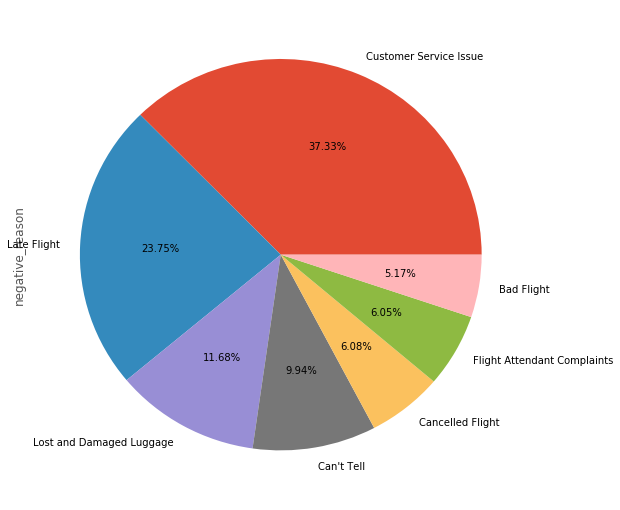

In [148]:
tweets_df[tweets_df.sentiment=='negative'].negative_reason.value_counts().plot(kind='pie', autopct='%1.2f%%',figsize=[9,9])

In [79]:
grid_clf.best_estimator_.fit(X_train,y_train)
print(classification_report(grid_clf.best_estimator_.predict(X_test), y_test))

                             precision    recall  f1-score   support

                 Bad Flight       0.41      0.64      0.50        25
                 Can't Tell       0.73      0.68      0.70        78
           Cancelled Flight       0.92      0.87      0.89       141
     Customer Service Issue       0.88      0.89      0.89       430
Flight Attendant Complaints       0.62      0.69      0.65        35
                Late Flight       0.88      0.86      0.87       249
   Lost and Damaged Luggage       0.91      0.87      0.89       143

                avg / total       0.86      0.85      0.86      1101



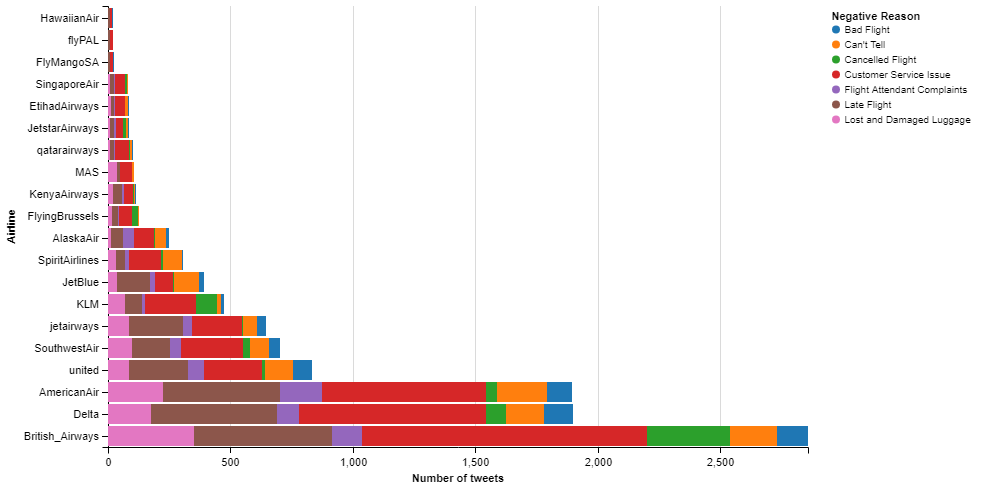

In [154]:
alt.Chart(tweets_df[tweets_df.sentiment=='negative'].to_altair()).mark_bar().encode(y=alt.Y('tweeted_to:N',sort=alt.SortField(field='tweeted_to:N',op='count',order='ascending'),title='Airline'),x=alt.X('count(*)',title='Number of tweets'),color=alt.Color('negative_reason:N',title='Negative Reason')).configure_cell(width=700, height=600)

In [81]:
gender_df = pd.read_csv('gender-classifier-DFE-791531.csv',encoding='latin1')

In [82]:
gender_df = gender_df[((gender_df.gender == 'male') | (gender_df.gender == "female")) & (gender_df['gender:confidence'] == 1) ].reset_index(drop=True)

In [83]:
gender_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719229,False,finalized,3,10/26/15 23:10,male,1.0,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
3,815719230,False,finalized,3,10/27/15 1:15,female,1.0,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
4,815719231,False,finalized,3,10/27/15 1:47,female,1.0,yes,1.0,3/11/10 18:14,you don't know me.,3901,NaN,F5ABB5,monroevicious,NaN,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)


In [156]:
gender_df.text=gender_df.text.apply(stem_and_lem)
feature_gender_df = pd.DataFrame()
feature_gender_df['features'] = ''
for k,item in enumerate(gender_df.loc[:,['text','description','sidebar_color','link_color']].astype(str).values):
    feature_gender_df.loc[k]=" ".join(item)

In [157]:
gender_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=0.001,
                                       max_iter=5, tol=None,
                                           class_weight='balanced')),])
X_train, X_test, y_train, y_test = train_test_split(feature_gender_df.features,gender_df.gender.astype(str),test_size=0.33,random_state=0,stratify=gender_df.gender)

In [158]:
gender_clf.fit(X_train,y_train)
predicted_test = gender_clf.predict(X_test)
print(classification_report(predicted_test, y_test))

             precision    recall  f1-score   support

     female       0.65      0.73      0.69      1575
       male       0.73      0.64      0.68      1732

avg / total       0.69      0.69      0.69      3307



In [87]:
parameters = {
    'vect__stop_words':('english',None),
    'tfidf__norm':('l1','l2'),
    'clf__loss': ('hinge','log','modified_huber'),
    'clf__alpha': (0.001,0.0001,0.00001, 0.000001),
    'clf__penalty': ('none','l1','l2'),
    'clf__max_iter': [10,100,1000],
}
grid_gender_clf = GridSearchCV(gender_clf,param_grid=parameters,cv=5,n_jobs=5)

In [88]:
grid_gender_clf.fit(feature_gender_df.features,gender_df.gender.astype(str))
grid_gender_clf.best_score_

0.70009980039920161

In [89]:
grid_gender_clf.best_params_

{'clf__alpha': 0.0001,
 'clf__loss': 'hinge',
 'clf__max_iter': 1000,
 'clf__penalty': 'none',
 'tfidf__norm': 'l1',
 'vect__stop_words': 'english'}

In [90]:
grid_gender_clf.best_estimator_.fit(X_train,y_train)
print(classification_report(grid_gender_clf.best_estimator_.predict(X_test), y_test))

             precision    recall  f1-score   support

     female       0.72      0.71      0.72      1789
       male       0.67      0.68      0.67      1518

avg / total       0.70      0.70      0.70      3307



In [91]:
temp_df = pd.DataFrame()
temp_df['features'] = ''
for k,item in enumerate(tweets_df.loc[:,['text','description','sidebar_color','link_color']].astype(str).values):
    temp_df.loc[k]=" ".join(item)
predicted = grid_gender_clf.best_estimator_.predict(temp_df.features)

In [92]:
tweets_df['gender']=""
tweets_df.loc[:,'gender']=predicted

In [93]:
tweets_df.tail()

,coordinates,description,followers_count,following_count,link_color,location,profile_created,profileimage,screen_name,sidebar_color,statuses_count,text,tweet_created_at,tweet_favourites_count,tweet_id,tweet_retweet_count,tweet_source,tweeted_to,user_favourites_count,user_name,user_timezone,verified,hashtags,mentions,sentiment_score,sentiment,negative_ratio,positive_ratio,text_length,followers_count_1,log_followers_count,log_statuses_count,negative_reason,gender
75066,None,"Welcome to http://t.co/O1jKN3DD36, created to ...",1533,589,0084B4,"Lagos, Nigeria",2014-03-10 19:40:40,http://pbs.twimg.com/profile_images/8321576336...,topontravel,DDEEF6,4742,@British_Airways to Increase flight to Holiday...,2017-12-06 14:31:38,0,9.384156e+17,0,Twitter Web Client,British_Airways,1241,Top On Travel,None,False,"#BA,#summer,#2018,#holidayseason",@British_Airways,0.6124,positive,NaN,0.501047,82,1534,7.335634,8.464214,,male
75067,None,"MBA god knows why, an ex HR professional, chan...",144,286,FFCC4D,Mumbai,2009-03-18 19:23:44,http://pbs.twimg.com/profile_images/8864711212...,violinmirage,000000,328,@jetairways Ok so today you are delaying 9w424...,2017-12-06 14:31:24,0,9.384156e+17,0,Twitter for iPhone,jetairways,299,Anuj,None,False,#jetairways,@jetairways,-0.3046,neutral,NaN,NaN,121,145,4.976734,5.793014,,female
75068,None,Haitian🇭🇹,239,86,1DA1F2,O'Block144,2011-09-30 05:42:48,http://pbs.twimg.com/profile_images/8530499515...,OliOloOlu,DDEEF6,15871,@Delta y’all need better dinner food in first ...,2017-12-06 14:31:06,0,9.384155e+17,0,Twitter for iPhone,Delta,2222,Oli'144,Atlantic Time (Canada),False,NaN,@Delta,0.5423,positive,NaN,0.635998,101,240,5.480639,9.672249,,female
75069,None,Stop worrying and enjoy the experiment,581,385,0084B4,"Seattle, WA",2009-03-23 04:25:48,http://pbs.twimg.com/profile_images/6757110687...,benofreedman,DDFFCC,1163,"@AlaskaAir This was flight 12, about twenty of...",2017-12-06 14:30:53,0,9.384155e+17,0,Twitter for iPhone,AlaskaAir,762,Beno Freedman,Eastern Time (US & Canada),False,NaN,"@AlaskaAir,@SeaTacAirport",0.1027,neutral,NaN,NaN,177,582,6.366470,7.058758,,male
75070,None,NaN,21,90,036564,NaN,2009-02-27 17:56:44,http://pbs.twimg.com/profile_images/2652564573...,Boylen,033649,114,@JetBlue is killing me lately. Pilot tells us...,2017-12-06 14:30:39,0,9.384154e+17,1,Twitter for iPhone,JetBlue,13,Donnelly,Eastern Time (US & Canada),False,#mosaiclife,@JetBlue,-0.2640,neutral,NaN,NaN,165,22,3.091042,4.736198,,female


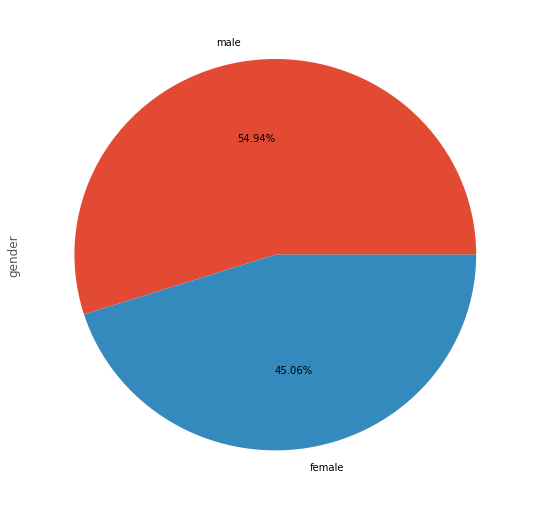

In [94]:
tweets_df.gender.value_counts().plot(kind='pie', autopct='%1.2f%%',figsize=[9,9])

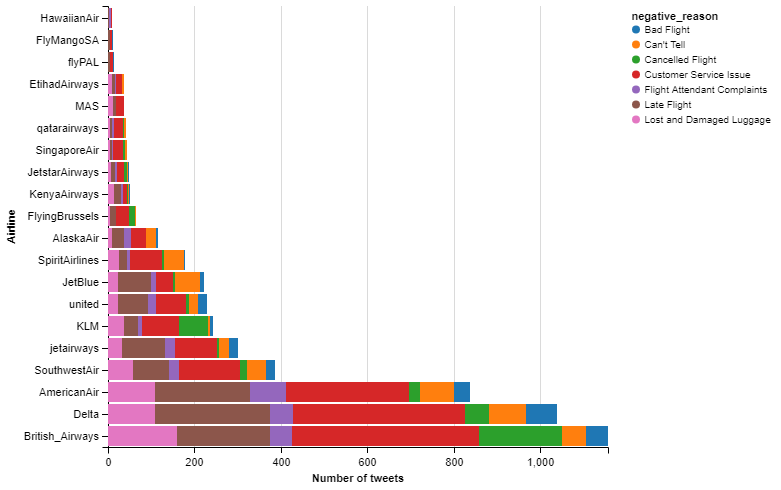

In [95]:
alt.Chart(tweets_df[(tweets_df.sentiment=='negative') & (tweets_df.gender=='male')].to_altair()).mark_bar().encode(y=alt.Y('tweeted_to:N',sort=alt.SortField(field='tweeted_to:N',op='count',order='ascending'),title='Airline'),x=alt.X('count(*)',title='Number of tweets'),color='negative_reason:N')

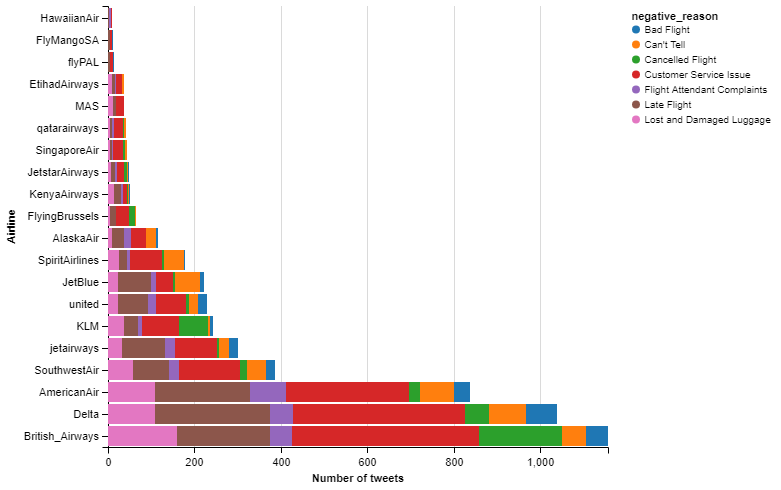

In [163]:
alt.Chart(tweets_df[(tweets_df.sentiment=='negative') & (tweets_df.gender=='female')].to_altair()).mark_bar().encode(y=alt.Y('tweeted_to:N',sort=alt.SortField(field='tweeted_to:N',op='count',order='ascending'),title='Airline'),x=alt.X('count(*)',title='Number of tweets'),color='negative_reason:N')

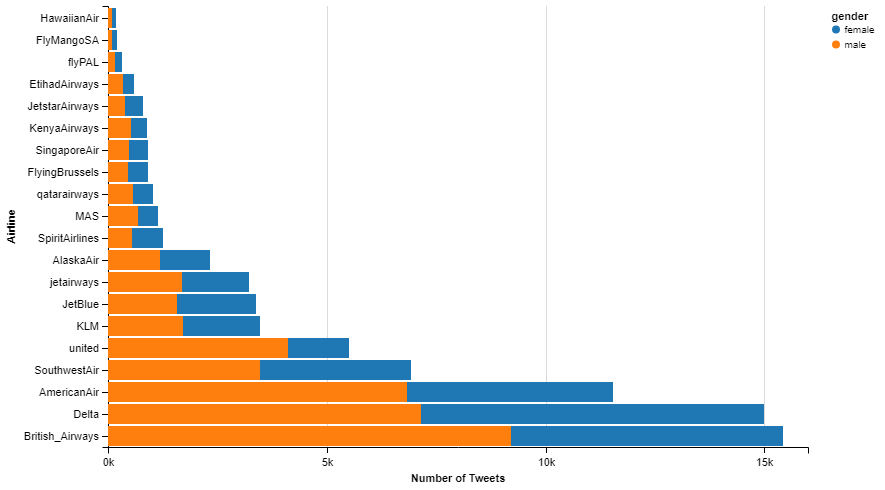

In [155]:
alt.Chart(tweets_df.to_altair()).mark_bar().encode(y=alt.Y('tweeted_to:N',sort=alt.SortField(field='*',op='count',order='ascending'),title='Airline'),x=alt.X('count(*):Q',title='Number of Tweets'),color='gender:N').configure_cell(width=700, height=600)

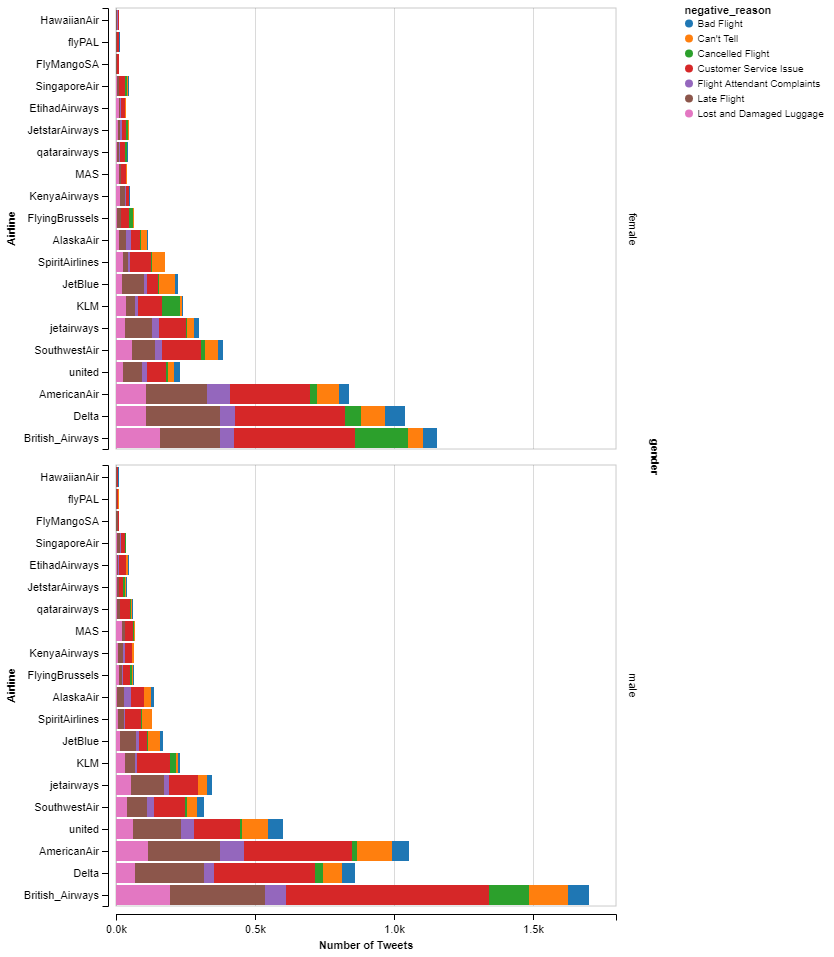

In [98]:
alt.Chart(tweets_df[tweets_df.sentiment=='negative'].to_altair()).mark_bar().encode(y=alt.Y('tweeted_to:N',sort=alt.SortField(field='*',op='count',order='ascending'),title='Airline'),x=alt.X('count(*):Q',title='Number of Tweets'),row='gender:N',color='negative_reason:N')

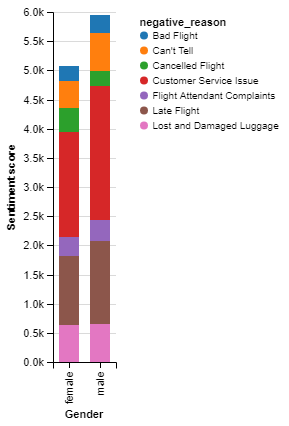

In [99]:
alt.Chart(tweets_df[tweets_df.sentiment=='negative'].to_altair()).mark_bar().encode(x=alt.X('gender:N',sort=alt.SortField(field='*',op='count',order='ascending'),title='Gender'),y=alt.Y('count(negative_reason):Q',title='Sentiment score'),color='negative_reason:N')